In [12]:
# Import delle librerie necessarie 
    # - sklearn per l'import del dataset, training e performance evaluation 
    # - numpy per le operazioni matematiche di base 
    # - matplotlib per la visualizzazione dei grafici
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Caricamento del dataset (uso una funzione fornita come metodo dalla libreria
# scikit-learn)
breastCancer = load_breast_cancer()
X, y = breastCancer.data, breastCancer.target

In [13]:
# Stampo la descrizione del dataset
print("Descrizione dataset:")
# Limito la stampa perchè era troppo lunga
print(breastCancer['DESCR'])

Descrizione dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is 

In [14]:
# #############################################################################
# Partizionamento del dataset in: training_set(per l'addestramento) e 
# test_set(per la valutazione delle performance)
# #############################################################################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [15]:
# =============================================================================
# 2) Implementazione algoritmi di classificazione
# =============================================================================
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Per l'esercitazione ho deciso di implementare questi tre classificatori:
    # - SVC
    # - Decision Tree
    # - Random Forest
## Istanzio i classificatori in un  dizionario python
classifiers = {
    "SVC": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [16]:
## Addestramento e valutazione
results = {}

# Ciclo i  classificatori e per ognuno eseguo l'addestramento (con .fit) e la 
# valutazione.
# In questo bloccosalvo le predizioni e  le probabilità (o decision function)
# sono essenziali per il calcolo delle metriche richieste al punto 4(ROC e AUC) 
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    results[name] = (y_pred, y_proba)
    

In [17]:
# 3) Calcolo  metriche di valutazione
# =============================================================================
from sklearn.metrics import precision_score, recall_score, f1_score
# Faccio un  secondo import per ragioni di lunghezza della riga e non sforare
# dalla larghezze tenuta per il documento 
from sklearn.metrics import accuracy_score, roc_auc_score

# Stampo le metriche di valutazione troncando il valore numerico associato ad 
# ognuna alla quarta cifra  decimale
print("\n=== METRICHE DI VALUTAZIONE OTTENUTE === ")
for name, (y_pred, y_proba) in results.items():
    print(f" \n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


=== METRICHE DI VALUTAZIONE OTTENUTE === 
 
--- SVC ---
Accuracy: 0.9357
Precision: 0.9076
Recall: 1.0000
F1-Score: 0.9515
ROC AUC: 0.9931
 
--- Decision Tree ---
Accuracy: 0.9415
Precision: 0.9712
Recall: 0.9352
F1-Score: 0.9528
ROC AUC: 0.9438
 
--- Random Forest ---
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1-Score: 0.9772
ROC AUC: 0.9968


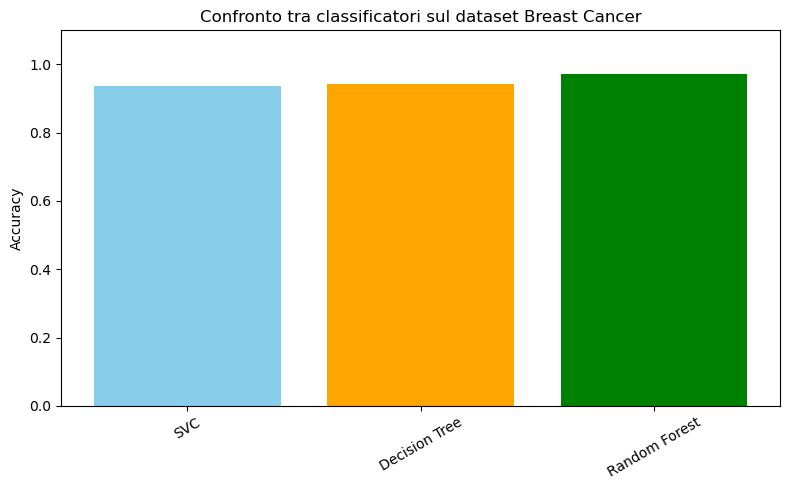

In [18]:
# Grafico a barre come visto a lezione delle varie accuratezze per ogni 
# metodo usato
accuracies = [accuracy_score(y_test, results[name][0]) for name in results.keys()]

## Definisco i parametri del grafico per la visualizzazione dell'accuratezza ed 
# il confronto tra i classificatori
plt.figure(figsize=(8,5))
plt.bar(results.keys(), accuracies, color=["skyblue","orange","green"])
plt.ylabel("Accuracy")
plt.title("Confronto tra classificatori sul dataset Breast Cancer")
plt.ylim(0,1.1)
plt.xticks(rotation=30)
plt.tight_layout()
# Stampo il grafico a video
plt.show()

In [19]:
# =============================================================================
# 4) Visualizzazione della matrice di  confusione e delle curve roc in grafici
# =============================================================================
from sklearn.metrics import confusion_matrix, roc_curve

## Matrici di confusione
    # Ciclo ogni valutazione (memorizzata nell'array results)
    # Per ognuna stampo poi la matrice di confusione
for idx, (name, (y_pred, _)) in enumerate(results.items()):
   print(f"\nConfusion Matrix, {name}:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix, SVC:
 [[ 52  11]
 [  0 108]]

Confusion Matrix, Decision Tree:
 [[ 60   3]
 [  7 101]]

Confusion Matrix, Random Forest:
 [[ 59   4]
 [  1 107]]


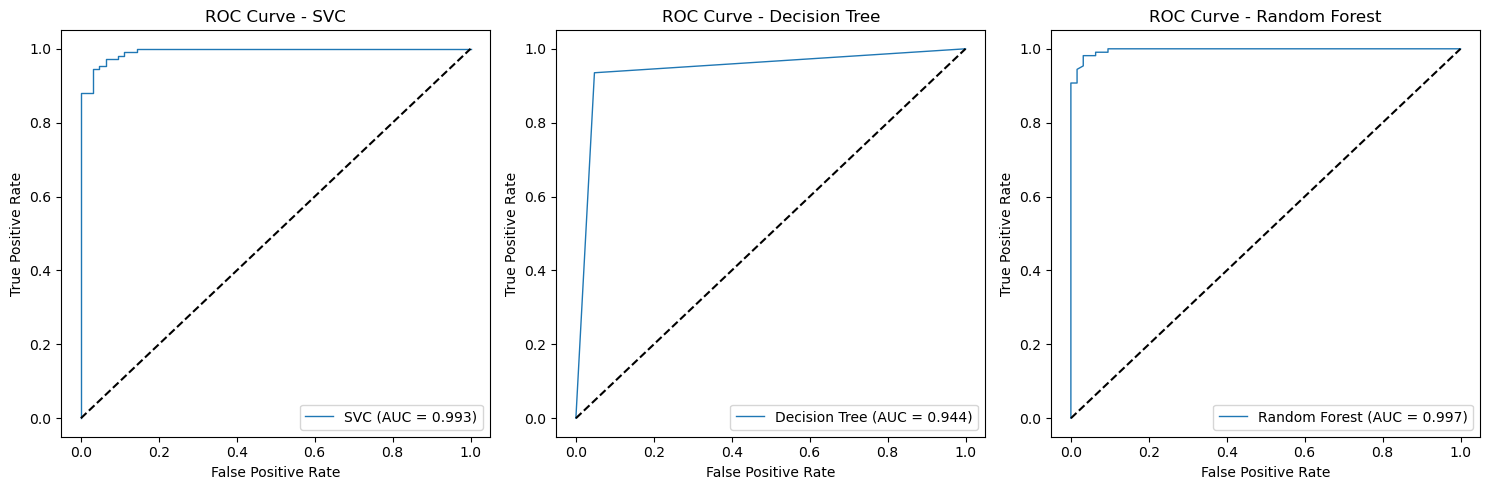

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Ciclo ogni valutazione e per ognuna stampo l'area sottesa dalla curva ROC (AUC)
for idx, (name, (_, y_proba)) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[idx].plot(fpr, tpr, linewidth=1,  label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})')
    axes[idx].plot([0, 1], [0, 1], 'k--')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve - {name}')
    axes[idx].legend(loc='lower right')

plt.tight_layout()
# Stampo il grafico a video
plt.show()

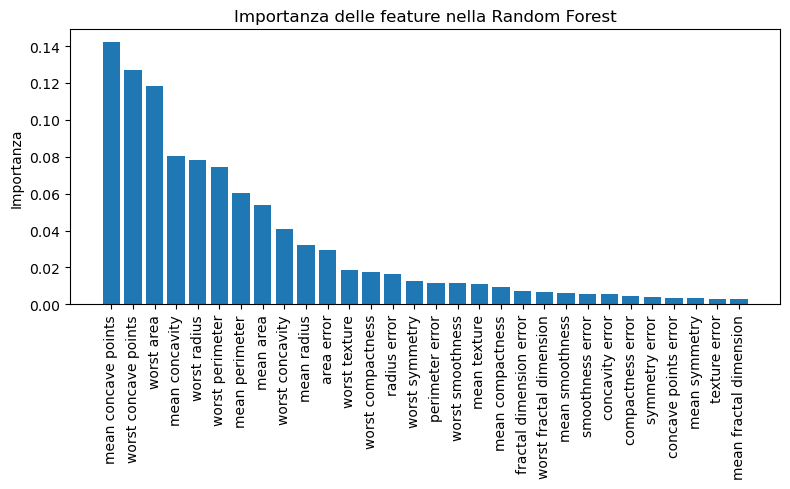

In [21]:
# =============================================================================
#  [EXTRA] Stampa del grafico relativo alle feature  importance per l'algoritmo: Random Forest
# =============================================================================
# Grafico dell'importanza delle feature (Solo per la Random Forest)
# Salvo nella variabile rf_classifier il classificatore associato al metodo  Random Forest
rf_classifier = classifiers['Random Forest']
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [breastCancer.feature_names[i] for i in indices], rotation=90)
plt.title("Importanza delle feature nella Random Forest")
plt.ylabel("Importanza")
plt.tight_layout()
plt.show()